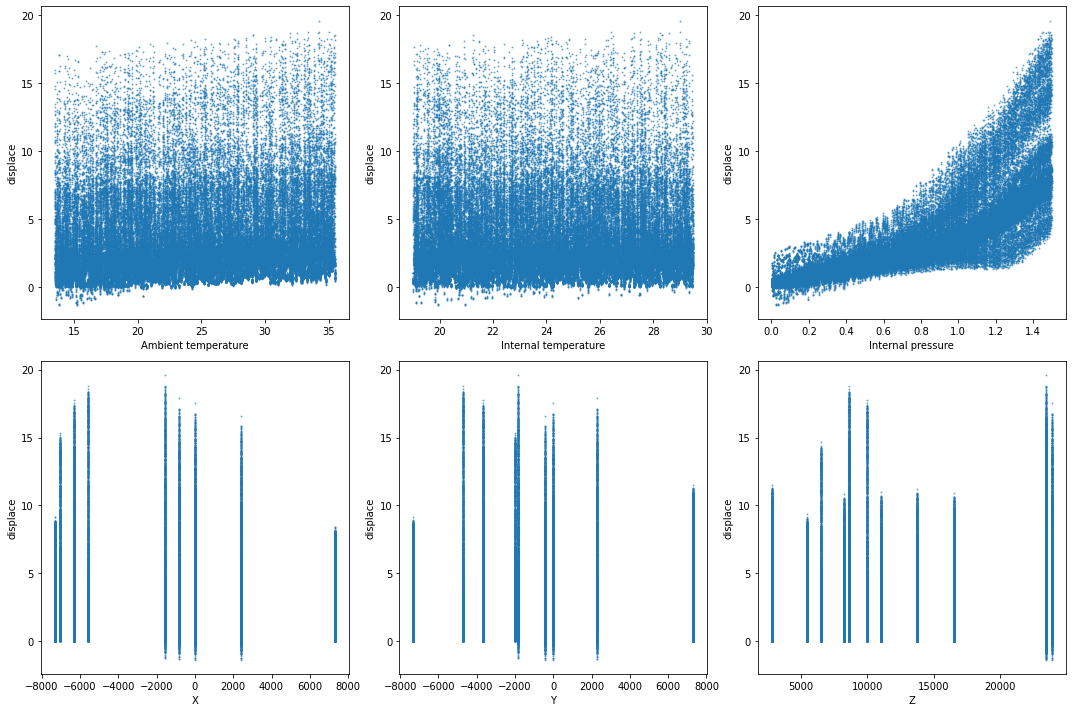

In [1]:
#输入与输出之间的数据关系
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(csv_file)

# 获取输入和输出数据
input_columns = ['Ambient temperature', 'Internal temperature', 'Internal pressure', 'X', 'Y', 'Z']
output_column = 'displace'
inputs = df[input_columns]
output = df[output_column]

# 绘制散点图
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(input_columns):
    axs[i].scatter(inputs[col], output, s=1, alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel(output_column)

plt.tight_layout()
plt.show()


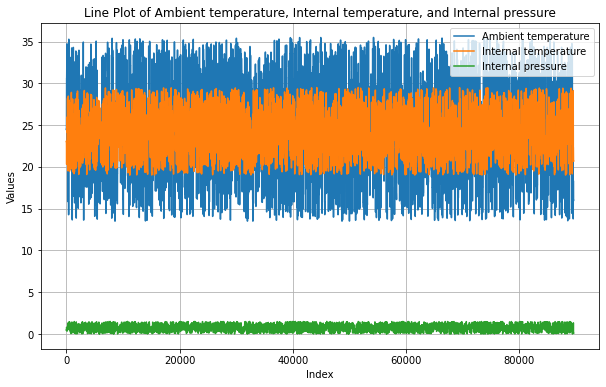

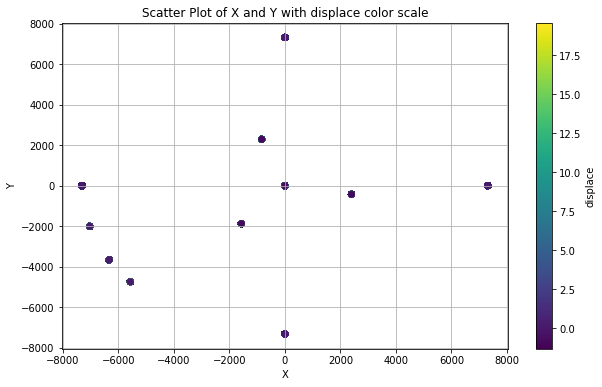

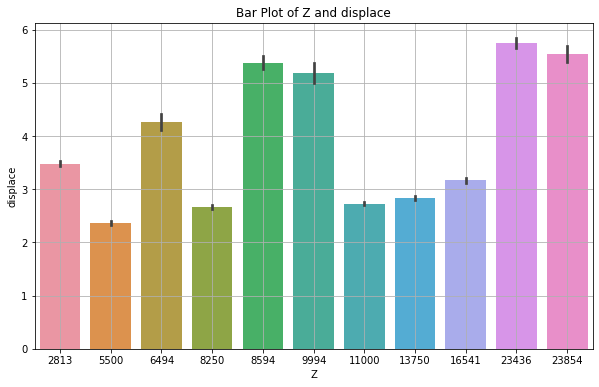

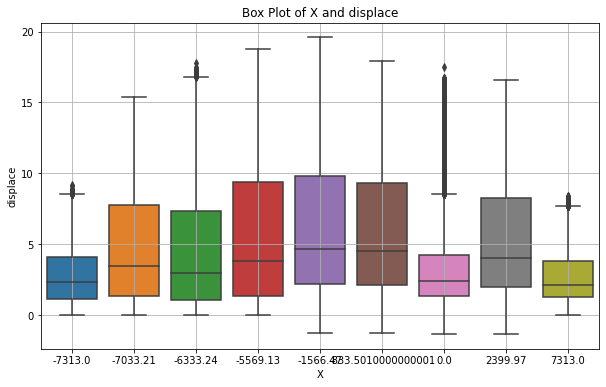

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
csv_file = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(csv_file)

# 可视化方法1：折线图
plt.figure(figsize=(10, 6))
plt.plot(df['Ambient temperature'], label='Ambient temperature')
plt.plot(df['Internal temperature'], label='Internal temperature')
plt.plot(df['Internal pressure'], label='Internal pressure')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Ambient temperature, Internal temperature, and Internal pressure')
plt.grid()
plt.show()

# 可视化方法2：散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['displace'], cmap='viridis')
plt.colorbar(label='displace')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y with displace color scale')
plt.grid()
plt.show()

# 可视化方法3：柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x='Z', y='displace', data=df)
plt.xlabel('Z')
plt.ylabel('displace')
plt.title('Bar Plot of Z and displace')
plt.grid()
plt.show()

# 可视化方法4：箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='X', y='displace', data=df)
plt.xlabel('X')
plt.ylabel('displace')
plt.title('Box Plot of X and displace')
plt.grid()
plt.show()



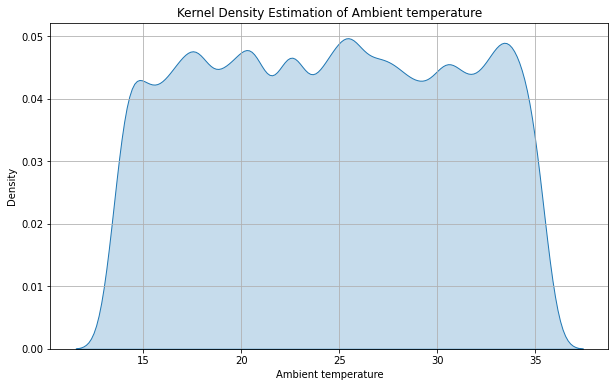

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Ambient temperature'], fill=True)
plt.xlabel('Ambient temperature')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Ambient temperature')
plt.grid()
plt.show()


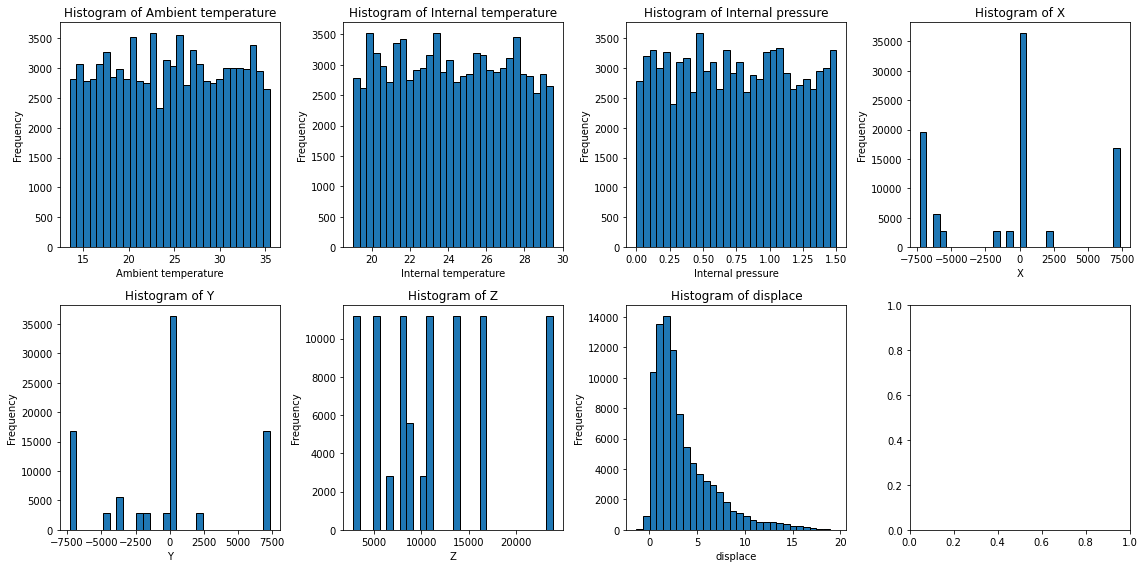

In [14]:
import matplotlib.pyplot as plt

# 设置子图的行数和列数
num_rows = 2
num_cols = 4

# 创建一个包含子图的画布
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# 循环遍历七列数据，并绘制直方图
columns = df.columns
for i, ax in enumerate(axes.flat):
    if i < len(columns):
        column_name = columns[i]
        ax.hist(df[column_name], bins=30, edgecolor='black')
        ax.set_title(f'Histogram of {column_name}')
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency')
#         ax.grid()

# 调整子图的布局
plt.tight_layout()
plt.show()


In [4]:
# 步骤1：数据加载和预处理
import pandas as pd

# 请替换成您的文件路径
file_path = "E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"

# 从CSV文件中加载数据
data = pd.read_csv(file_path)

# 步骤2：设置环境
from pycaret.regression import *

# 初始化PyCaret并设置环境
regression_setup = setup(data, target='displace', train_size=0.8, numeric_features=['Z'], normalize=True)

# 步骤3：比较回归模型
compare_models()

# 步骤4：模型训练
# 自动选择最佳模型并使用训练数据进行训练

# 步骤5：模型评估
# 使用测试数据来评估每个模型的性能
# PyCaret会自动帮我们完成这一步骤，无需额外编写代码

# 步骤6：结果展示
# PyCaret会自动帮我们展示每种机器学习方法在训练集和测试集上的评估结果



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0428,0.0041,0.0639,0.9996,0.0186,0.0365,0.7760
rf,Random Forest Regressor,0.0502,0.0061,0.0780,0.9994,0.0171,0.0346,0.9580
lightgbm,Light Gradient Boosting Machine,0.0905,0.0147,0.1214,0.9985,0.0342,0.0813,0.0600
dt,Decision Tree Regressor,0.0859,0.0191,0.1380,0.9981,0.0287,0.0487,0.0390
knn,K Neighbors Regressor,0.1610,0.0671,0.2591,0.9933,0.0500,0.1228,0.0570
gbr,Gradient Boosting Regressor,0.2787,0.1633,0.4038,0.9837,0.0983,0.2518,0.3990
ada,AdaBoost Regressor,1.0167,1.4420,1.2008,0.8560,0.3029,1.0519,0.2670
lar,Least Angle Regression,1.2252,3.0913,1.7581,0.6914,0.3193,1.1075,0.0080
br,Bayesian Ridge,1.2252,3.0913,1.7581,0.6914,0.3193,1.1074,0.0210
ridge,Ridge Regression,1.2252,3.0913,1.7581,0.6914,0.3193,1.1074,0.0170


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5948, verbose=0, warm_start=False)

In [12]:
# 步骤1：使用PyCaret的compare_models()函数比较回归模型，并选择效果最好的9个模型
best_models = compare_models(n_select=9)

# 步骤2：使用选择的9个模型分别在训练集和测试集上进行预测，并保存真实值与预测值
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 将数据拆分为训练集和测试集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 定义函数绘制真实值与预测值的45°图
def plot_45degree_graph(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    plt.savefig(title + '.png')
    plt.close()

# 步骤3：遍历每个模型，绘制真实值与预测值的45°图，并保存图像
for model in best_models:
    # 在训练集上进行预测并保存图像
    model_name = str(model).split(' ')[0]  # 获取模型名称，用于保存图像文件名
    model.fit(train_data.drop('displace', axis=1), train_data['displace'])
    train_predictions = model.predict(train_data.drop('displace', axis=1))
    plot_45degree_graph(train_data['displace'], train_predictions, 'Train_' + model_name)

    # 在测试集上进行预测并保存图像
    test_predictions = model.predict(test_data.drop('displace', axis=1))
    plot_45degree_graph(test_data['displace'], test_predictions, 'Test_' + model_name)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0432,0.0041,0.0643,0.9996,0.0186,0.0359,0.7580
rf,Random Forest Regressor,0.0508,0.0062,0.0789,0.9994,0.0172,0.0344,0.9590
lightgbm,Light Gradient Boosting Machine,0.0914,0.0151,0.1229,0.9985,0.0344,0.0810,0.0590
dt,Decision Tree Regressor,0.0864,0.0193,0.1391,0.9981,0.0287,0.0486,0.0380
knn,K Neighbors Regressor,0.1621,0.0691,0.2629,0.9932,0.0501,0.1264,0.0600
gbr,Gradient Boosting Regressor,0.2792,0.1641,0.4048,0.9837,0.0972,0.2485,0.4050
ada,AdaBoost Regressor,1.0237,1.4410,1.2002,0.8571,0.3066,1.0657,0.2620
lar,Least Angle Regression,1.2307,3.1019,1.7611,0.6926,0.3201,1.1105,0.0200
br,Bayesian Ridge,1.2307,3.1019,1.7611,0.6926,0.3201,1.1104,0.0170
ridge,Ridge Regression,1.2307,3.1019,1.7611,0.6926,0.3201,1.1105,0.0160


In [15]:
# 步骤1：使用PyCaret的compare_models()函数比较回归模型，并选择效果最好的9个模型
best_models = compare_models(n_select=9)

# 步骤2：使用选择的9个模型分别在训练集和测试集上进行预测，并保存真实值与预测值
from sklearn.model_selection import train_test_split
import pandas as pd

# 将数据拆分为训练集和测试集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 定义函数绘制真实值与预测值的45°图
def plot_45degree_graph(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    plt.savefig(title + '.png')
    plt.close()

# 定义保存评估结果的DataFrame
eval_results = pd.DataFrame(columns=['Model', 'Data', 'MSE', 'R2'])

# 步骤3：遍历每个模型，绘制真实值与预测值的45°图，并保存图像
for model in best_models:
    # 在训练集上进行预测并保存图像
    model_name = str(model).split(' ')[0]  # 获取模型名称，用于保存图像文件名
    model.fit(train_data.drop('displace', axis=1), train_data['displace'])
    train_predictions = model.predict(train_data.drop('displace', axis=1))
    plot_45degree_graph(train_data['displace'], train_predictions, 'Train_' + model_name)

    # 在测试集上进行预测并保存图像
    test_predictions = model.predict(test_data.drop('displace', axis=1))
    plot_45degree_graph(test_data['displace'], test_predictions, 'Test_' + model_name)

    # 模型在训练集上的评估
    train_mse = round(mean_squared_error(train_data['displace'], train_predictions), 4)
    train_r2 = round(r2_score(train_data['displace'], train_predictions), 4)
    eval_results = eval_results.append({'Model': model_name, 'Data': 'Train', 'MSE': train_mse, 'R2': train_r2}, ignore_index=True)

    # 模型在测试集上的评估
    test_mse = round(mean_squared_error(test_data['displace'], test_predictions), 4)
    test_r2 = round(r2_score(test_data['displace'], test_predictions), 4)
    eval_results = eval_results.append({'Model': model_name, 'Data': 'Test', 'MSE': test_mse, 'R2': test_r2}, ignore_index=True)

# 保存评估结果到CSV文件
eval_results.to_csv('model_evaluation_results.csv', index=False)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0432,0.0041,0.0643,0.9996,0.0186,0.0359,0.7660
rf,Random Forest Regressor,0.0508,0.0062,0.0789,0.9994,0.0172,0.0344,0.9680
lightgbm,Light Gradient Boosting Machine,0.0914,0.0151,0.1229,0.9985,0.0344,0.0810,0.0580
dt,Decision Tree Regressor,0.0864,0.0193,0.1391,0.9981,0.0287,0.0486,0.0390
knn,K Neighbors Regressor,0.1621,0.0691,0.2629,0.9932,0.0501,0.1264,0.0600
gbr,Gradient Boosting Regressor,0.2792,0.1641,0.4048,0.9837,0.0972,0.2485,0.3970
ada,AdaBoost Regressor,1.0237,1.4410,1.2002,0.8571,0.3066,1.0657,0.2740
lar,Least Angle Regression,1.2307,3.1019,1.7611,0.6926,0.3201,1.1105,0.0180
br,Bayesian Ridge,1.2307,3.1019,1.7611,0.6926,0.3201,1.1104,0.0180
ridge,Ridge Regression,1.2307,3.1019,1.7611,0.6926,0.3201,1.1105,0.0170


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0474,0.0048,0.0696,0.9995,0.0204,0.0422
1,0.0462,0.0048,0.0690,0.9995,0.0204,0.0370
2,0.0457,0.0044,0.0665,0.9995,0.0199,0.0325
3,0.0462,0.0047,0.0688,0.9995,0.0204,0.0413
4,0.0456,0.0046,0.0675,0.9995,0.0194,0.0356
5,0.0460,0.0046,0.0676,0.9996,0.0200,0.0336
6,0.0463,0.0047,0.0687,0.9995,0.0192,0.0341
7,0.0467,0.0051,0.0711,0.9995,0.0198,0.0362
8,0.0450,0.0045,0.0671,0.9996,0.0195,0.0422


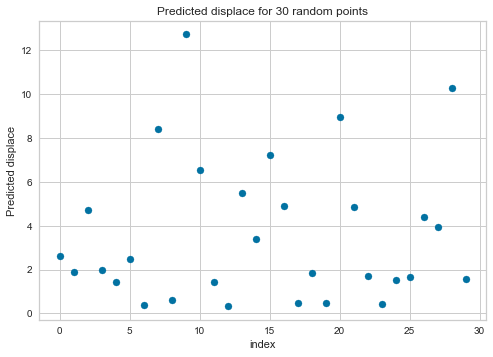

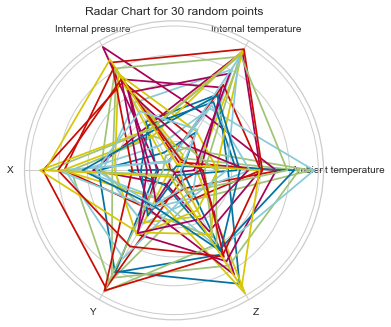

In [7]:
# 导入必要的库和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

# 加载数据集
file_path = "E:/研究生/科研生活/横向课题/低代码/disposed_data.csv"
data = pd.read_csv(file_path)

# 初始化Pycaret回归环境
regression_setup = setup(data, target='displace', numeric_features=['Ambient temperature', 'Internal temperature', 'Internal pressure', 'X', 'Y', 'Z'])

# 优化调参
best_model = create_model('et')

# 训练优化后的模型
final_model = finalize_model(best_model)

# 随机生成30个输入点
np.random.seed(42)
random_points = pd.DataFrame({
    'Ambient temperature': np.random.uniform(data['Ambient temperature'].min(), data['Ambient temperature'].max(), 30),
    'Internal temperature': np.random.uniform(data['Internal temperature'].min(), data['Internal temperature'].max(), 30),
    'Internal pressure': np.random.uniform(data['Internal pressure'].min(), data['Internal pressure'].max(), 30),
    'X': np.random.uniform(data['X'].min(), data['X'].max(), 30),
    'Y': np.random.uniform(data['Y'].min(), data['Y'].max(), 30),
    'Z': np.random.uniform(data['Z'].min(), data['Z'].max(), 30)
})

# 使用模型预测displace值
predictions = predict_model(final_model, data=random_points)

# 绘制散点图
plt.scatter(range(30), predictions['Label'])  # 注意此处使用Label列表示预测值
plt.xlabel('index')
plt.ylabel('Predicted displace')
plt.title('Predicted displace for 30 random points')
plt.show()

# 绘制雷达图
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# 将数据归一化到0-1之间
normalized_points = (random_points - data.drop('displace', axis=1).min()) / (data.drop('displace', axis=1).max() - data.drop('displace', axis=1).min())

# 添加雷达图的每个维度
for i in range(30):
    theta = np.linspace(0, 2 * np.pi, 6, endpoint=False)
    values = normalized_points.iloc[i, :].values
    values = np.append(values, values[0])  # 闭合圈
    theta = np.append(theta, theta[0])  # 闭合圈
    ax.plot(theta, values)

# 添加刻度标签
ax.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
ax.set_xticklabels(data.drop('displace', axis=1).columns)
ax.set_yticklabels([])  # 不显示刻度标签，因为归一化后的取值范围在0-1之间
ax.set_title('Radar Chart for 30 random points')
plt.show()


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0463,0.0047,0.0688,0.9995,0.0199,0.0347
1,0.0469,0.0049,0.0703,0.9995,0.0193,0.0343
2,0.0455,0.0045,0.0672,0.9996,0.0193,0.0372
3,0.0466,0.0048,0.0694,0.9995,0.0198,0.0382
4,0.0459,0.0045,0.0671,0.9995,0.0198,0.0449
5,0.0473,0.0051,0.0712,0.9995,0.0208,0.0416
6,0.0462,0.0048,0.0690,0.9995,0.0199,0.0482
7,0.0461,0.0045,0.0675,0.9996,0.0197,0.0386
8,0.0466,0.0048,0.0692,0.9995,0.0197,0.0394


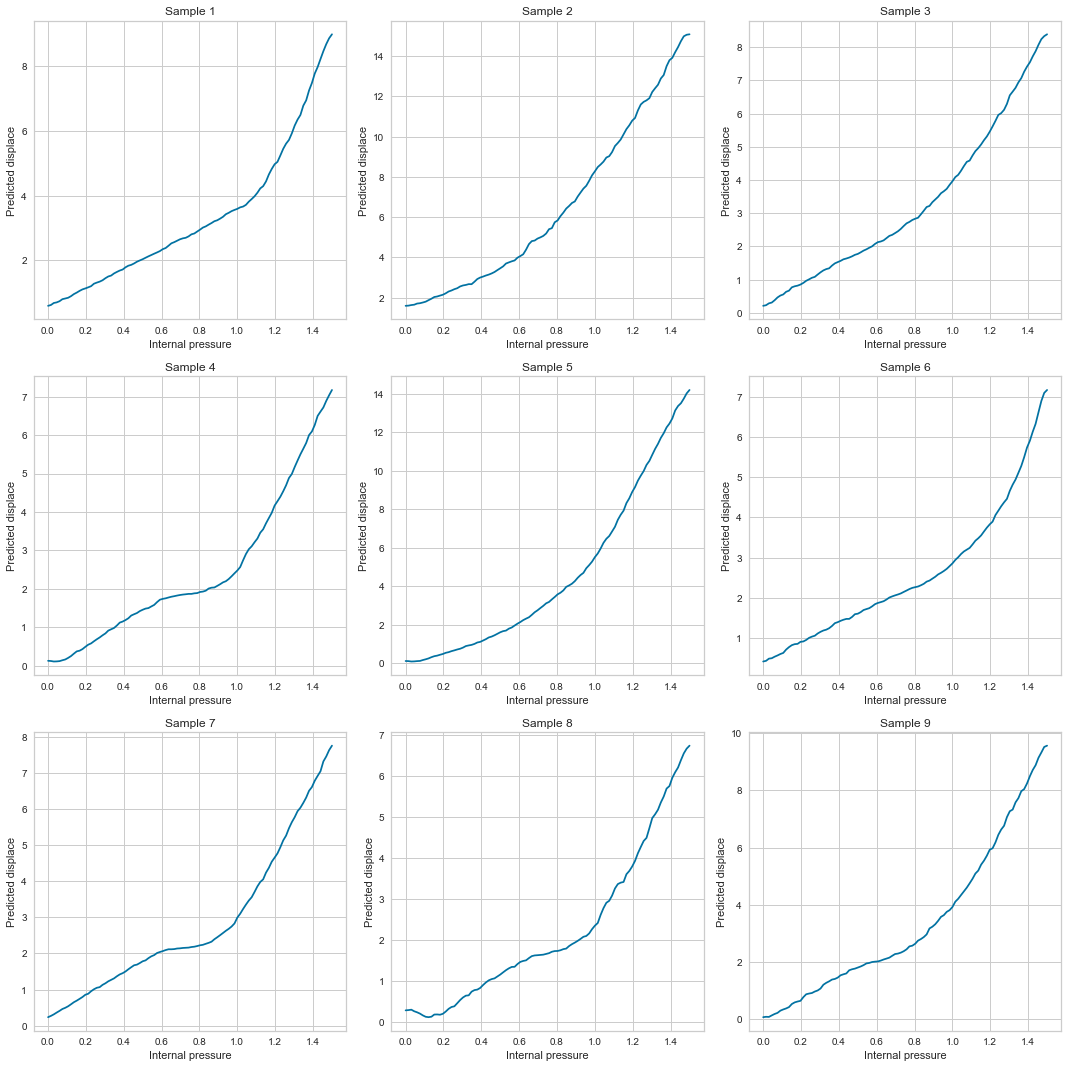

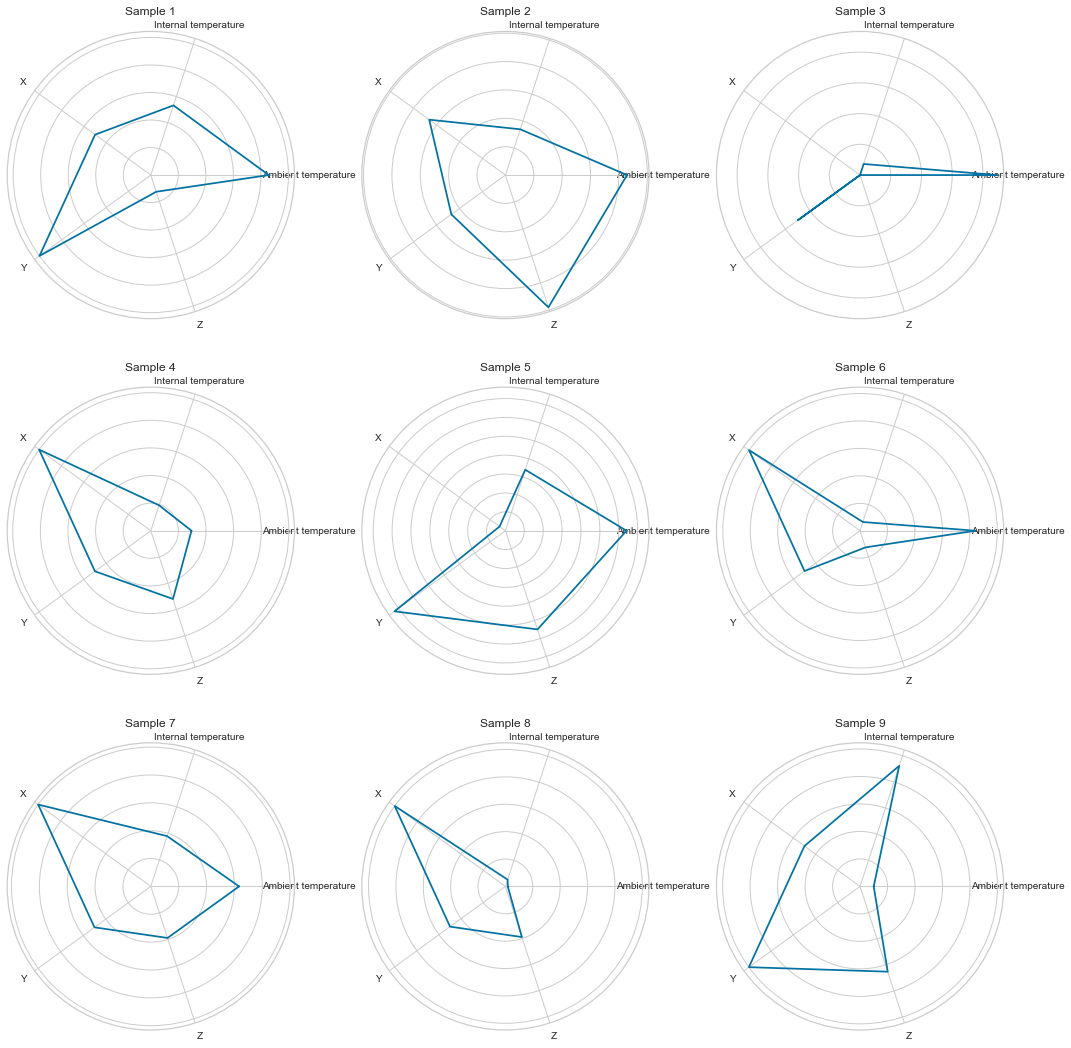

In [2]:
# 导入必要的库和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

# 加载数据集
file_path = "E:/研究生/科研生活/横向课题/低代码/disposed_data.csv"
data = pd.read_csv(file_path)

# 初始化Pycaret回归环境
regression_setup = setup(data, target='displace', numeric_features=['Ambient temperature', 'Internal temperature', 'Internal pressure', 'X', 'Y', 'Z'])

# 优化调参
best_model = create_model('et')

# 训练优化后的模型
final_model = finalize_model(best_model)

# 随机抽取9组数据
np.random.seed(42)
random_indices = np.random.randint(0, len(data), 9)
sample_data = data.iloc[random_indices]

# 创建子图
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 处理每组数据
for i, ax in enumerate(axs.flatten()):
    # 固定变量维度
    control_variables = ['Ambient temperature', 'Internal temperature', 'X', 'Y', 'Z']
    fixed_variables = sample_data[control_variables].iloc[i].to_dict()
    
    # 创建内部压力变化范围
    internal_pressure_range = np.linspace(data['Internal pressure'].min(), data['Internal pressure'].max(), 100)
    
    # 预测displace值
    displace_predictions = []
    for pressure in internal_pressure_range:
        input_data = pd.DataFrame({**fixed_variables, 'Internal pressure': pressure}, index=[0])
        prediction = predict_model(final_model, data=input_data)['Label'].iloc[0]
        displace_predictions.append(prediction)
    
    # 绘制预测图
    ax.plot(internal_pressure_range, displace_predictions)
    ax.set_xlabel('Internal pressure')
    ax.set_ylabel('Predicted displace')
    ax.set_title(f'Sample {i+1}')
    ax.grid(True)

# 调整子图布局
plt.tight_layout()
plt.show()

# 绘制雷达图
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': 'polar'})

# 处理每组数据
for i, ax in enumerate(axs.flatten()):
    # 固定变量维度
    fixed_variables = sample_data[control_variables].iloc[i].to_dict()
    
    # 将数据归一化到0-1之间
    normalized_data = (pd.DataFrame(fixed_variables, index=[0]) - data[control_variables].min()) / (data[control_variables].max() - data[control_variables].min())
    
    # 添加雷达图的每个维度
    theta = np.linspace(0, 2 * np.pi, 5, endpoint=False)
    values = normalized_data.values[0]
    values = np.append(values, values[0])  # 闭合圈
    theta = np.append(theta, theta[0])  # 闭合圈
    ax.plot(theta, values)
    
    # 添加刻度标签
    ax.set_xticks(np.linspace(0, 2 * np.pi, 5, endpoint=False))
    ax.set_xticklabels(control_variables)
    ax.set_yticklabels([])  # 不显示刻度标签，因为归一化后的取值范围在0-1之间
    ax.set_title(f'Sample {i+1}')

# 调整子图布局
plt.tight_layout()
plt.show()


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0471,0.0048,0.0696,0.9995,0.0192,0.0334
1,0.0455,0.0046,0.0680,0.9996,0.0204,0.0381
2,0.0474,0.0053,0.0726,0.9995,0.0203,0.0390
3,0.0459,0.0046,0.0677,0.9995,0.0196,0.0411
4,0.0465,0.0048,0.0691,0.9995,0.0202,0.0487
5,0.0455,0.0045,0.0670,0.9995,0.0203,0.0377
6,0.0470,0.0047,0.0687,0.9995,0.0199,0.0341
7,0.0462,0.0045,0.0669,0.9996,0.0202,0.0445
8,0.0446,0.0042,0.0650,0.9996,0.0195,0.0390


ValueError: x and y must have same first dimension, but have shapes (6,) and (12,)

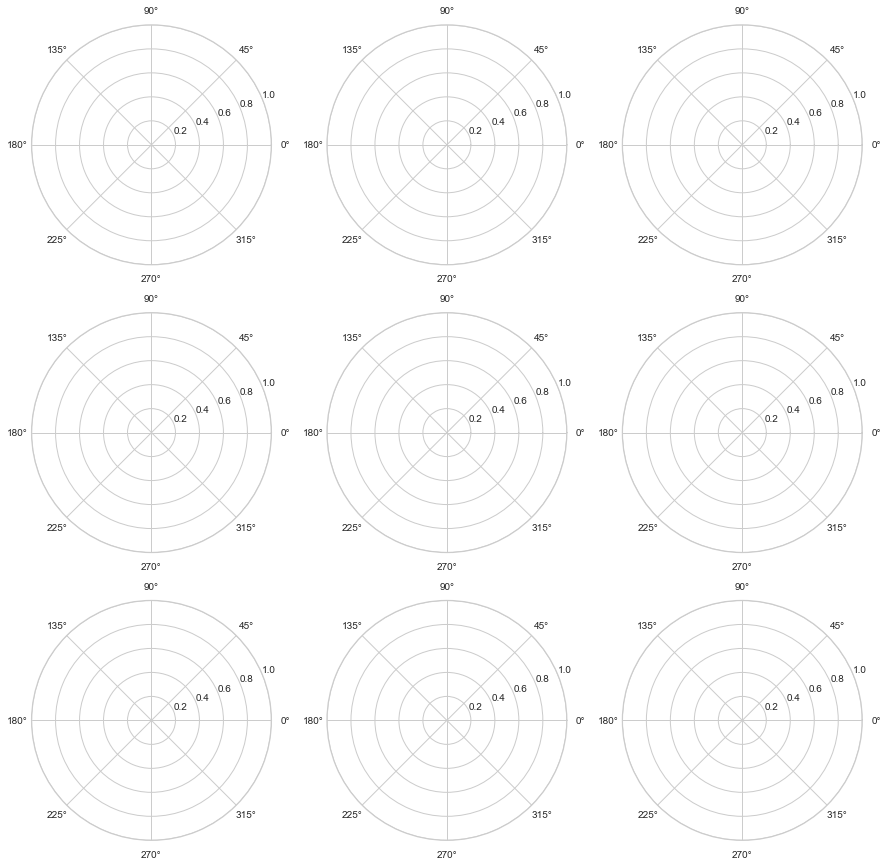

In [3]:
# 导入必要的库和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

# 加载数据集
file_path = "E:/研究生/科研生活/横向课题/低代码/disposed_data.csv"
data = pd.read_csv(file_path)

# 初始化Pycaret回归环境
regression_setup = setup(data, target='displace', numeric_features=['Ambient temperature', 'Internal temperature', 'Internal pressure', 'X', 'Y', 'Z'])

# 优化调参
best_model = create_model('et')

# 训练优化后的模型
final_model = finalize_model(best_model)

# 随机抽取9组数据
np.random.seed(42)
random_indices = np.random.randint(0, len(data), 9)
sample_data = data.iloc[random_indices]

# 创建雷达图的填充颜色
colors = plt.cm.rainbow(np.linspace(0, 1, len(sample_data)))

# 绘制雷达图
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': 'polar'})

# 处理每组数据
for i, ax in enumerate(axs.flatten()):
    # 固定变量维度
    fixed_variables = sample_data.iloc[i, [0, 1, 3, 4, 5]].values
    
    # 将数据归一化到0-1之间
    normalized_data = (pd.DataFrame(fixed_variables).T - data.drop('displace', axis=1).min()) / (data.drop('displace', axis=1).max() - data.drop('displace', axis=1).min())
    
    # 添加雷达图的每个维度
    theta = np.linspace(0, 2 * np.pi, 5, endpoint=False)
    values = normalized_data.values[0]
    values = np.append(values, values[0])  # 闭合圈
    theta = np.append(theta, theta[0])  # 闭合圈
    ax.plot(theta, values, color=colors[i])
    ax.fill(theta, values, alpha=0.25, color=colors[i])  # 填充颜色
    
    # 添加刻度标签
    ax.set_xticks(np.linspace(0, 2 * np.pi, 5, endpoint=False))
    ax.set_xticklabels(data.drop('displace', axis=1).columns)
    ax.set_yticklabels([])  # 不显示刻度标签，因为归一化后的取值范围在0-1之间
    ax.set_title(f'Sample {i+1}')

# 调整子图布局
plt.tight_layout()
plt.show()


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0463,0.0048,0.0693,0.9995,0.0203,0.0372
1,0.0467,0.0049,0.0700,0.9995,0.0207,0.0389
2,0.0456,0.0045,0.0673,0.9996,0.0191,0.0410
3,0.0472,0.0051,0.0713,0.9995,0.0201,0.0387
4,0.0467,0.0047,0.0687,0.9995,0.0194,0.0415
5,0.0466,0.0046,0.0681,0.9995,0.0196,0.0334
6,0.0454,0.0046,0.0682,0.9995,0.0192,0.0343
7,0.0464,0.0047,0.0683,0.9995,0.0197,0.0389
8,0.0457,0.0045,0.0670,0.9995,0.0196,0.0351


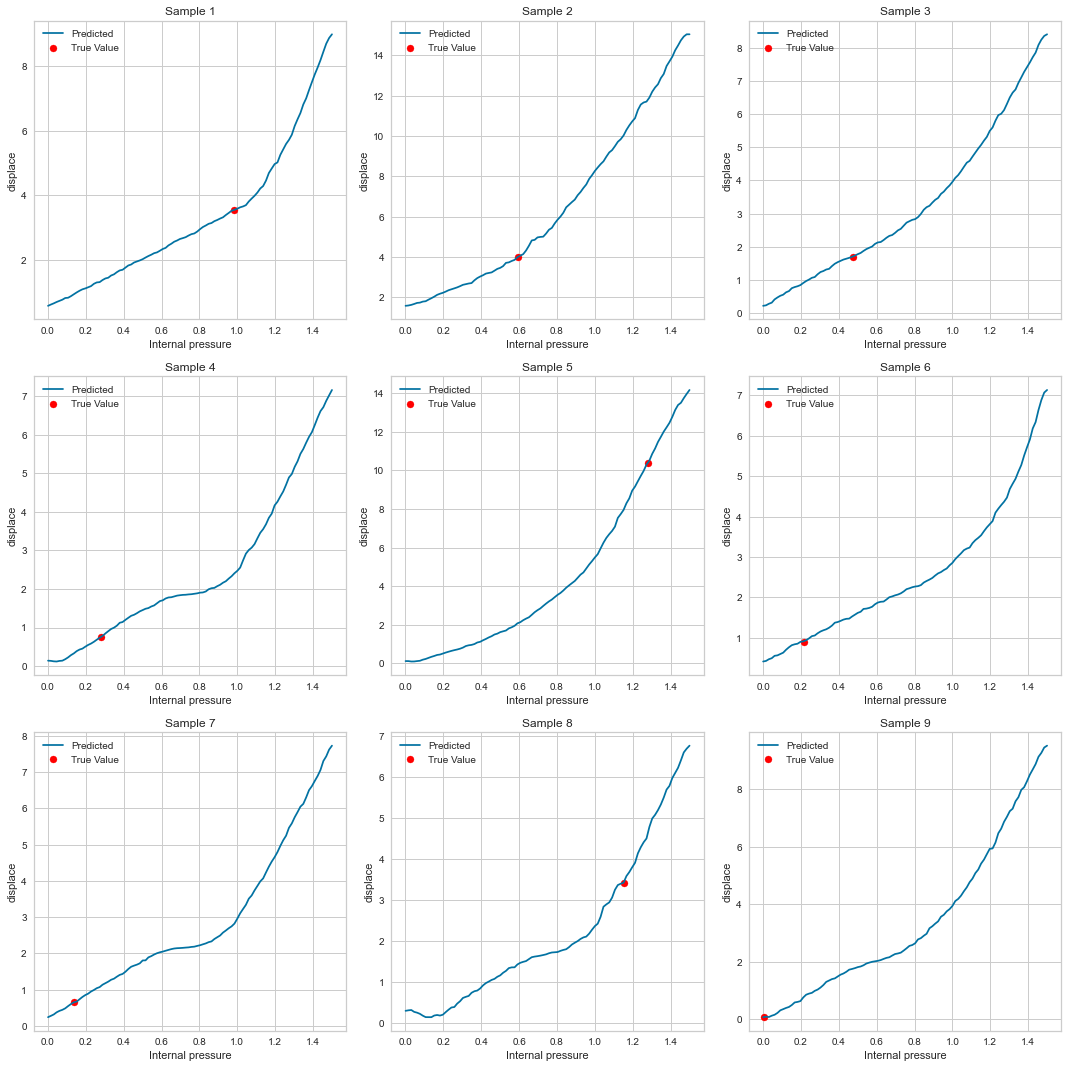

In [4]:
# 导入必要的库和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

# 加载数据集
file_path = "E:/研究生/科研生活/横向课题/低代码/disposed_data.csv"
data = pd.read_csv(file_path)

# 初始化Pycaret回归环境
regression_setup = setup(data, target='displace', numeric_features=['Ambient temperature', 'Internal temperature', 'Internal pressure', 'X', 'Y', 'Z'])

# 优化调参
best_model = create_model('et')

# 训练优化后的模型
final_model = finalize_model(best_model)

# 随机抽取9组数据
np.random.seed(42)
random_indices = np.random.randint(0, len(data), 9)
sample_data = data.iloc[random_indices]

# 创建子图
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 处理每组数据
for i, ax in enumerate(axs.flatten()):
    # 固定变量维度
    control_variables = ['Ambient temperature', 'Internal temperature', 'X', 'Y', 'Z']
    fixed_variables = sample_data[control_variables].iloc[i].to_dict()
    
    # 创建内部压力变化范围
    internal_pressure_range = np.linspace(data['Internal pressure'].min(), data['Internal pressure'].max(), 100)
    
    # 预测displace值
    displace_predictions = []
    for pressure in internal_pressure_range:
        input_data = pd.DataFrame({**fixed_variables, 'Internal pressure': pressure}, index=[0])
        prediction = predict_model(final_model, data=input_data)['Label'].iloc[0]
        displace_predictions.append(prediction)
    
    # 绘制预测曲线
    ax.plot(internal_pressure_range, displace_predictions, label='Predicted')
    
    # 添加真实值散点
    ax.scatter(sample_data['Internal pressure'].iloc[i], sample_data['displace'].iloc[i], color='red', label='True Value')
    
    ax.set_xlabel('Internal pressure')
    ax.set_ylabel('displace')
    ax.set_title(f'Sample {i+1}')
    ax.grid(True)
    ax.legend()

# 调整子图布局
plt.tight_layout()
plt.show()
